<a href="https://colab.research.google.com/github/anomaitech/gwdm_south_america/blob/main/GWDM_South_America.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   OBJECTID_1         km2  NOMBRE  NOMBRE_AC Categoria     Shape_Leng  \
0           1   59.285220  ESA-12  ESA-12-01   Central  108713.749838   
1           2    5.152762  ESA-09  ESA-09-03   Central   17758.541839   
2           3   21.448589  ESA-09  ESA-09-02   Central   36386.119699   
3           4   30.940501  ESA-16  ESA-16-01   Central   26856.728548   
4           5  156.757211  ESA-20  ESA-20-03   Costero   80621.303356   

     Shape_Area                                           geometry  
0  5.928522e+07  POLYGON ((546100.198 274949.481, 546095.938 27...  
1  5.152762e+06  POLYGON ((522199.438 276296.006, 522184.438 27...  
2  2.144859e+07  POLYGON ((519448.375 278257.913, 519440.094 27...  
3  3.094050e+07  POLYGON ((602465.171 278811.114, 602676.42 278...  
4  1.567572e+08  POLYGON ((623744.688 248265.866, 623801.75 248...  


<Axes: >

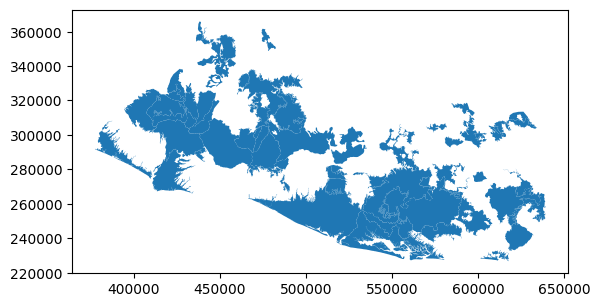

In [3]:
# prompt: import shapefile file using geopandas



import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("/content/acuiferos.shp")

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Plot the shapefile (optional)
gdf.plot()

In [4]:
gdf

,OBJECTID_1,km2,NOMBRE,NOMBRE_AC,Categoria,Shape_Leng,Shape_Area,geometry
0,1,59.285220,ESA-12,ESA-12-01,Central,108713.749838,5.928522e+07,"POLYGON ((546100.198 274949.481, 546095.938 27..."
1,2,5.152762,ESA-09,ESA-09-03,Central,17758.541839,5.152762e+06,"POLYGON ((522199.438 276296.006, 522184.438 27..."
2,3,21.448589,ESA-09,ESA-09-02,Central,36386.119699,2.144859e+07,"POLYGON ((519448.375 278257.913, 519440.094 27..."
3,4,30.940501,ESA-16,ESA-16-01,Central,26856.728548,3.094050e+07,"POLYGON ((602465.171 278811.114, 602676.42 278..."
4,5,156.757211,ESA-20,ESA-20-03,Costero,80621.303356,1.567572e+08,"POLYGON ((623744.688 248265.866, 623801.75 248..."
...,...,...,...,...,...,...,...,...
74,76,11.666582,ESA-12,ESA-12-05,Costero,29296.539566,1.166658e+07,"POLYGON ((554260.813 234775.366, 554272.813 23..."
75,77,7.910494,ESA-12,ESA-12-05,Costero,23764.662851,7.910494e+06,"POLYGON ((557146.438 236579.975, 557221.438 23..."
76,78,38.876390,ESA-12,ESA-12-05,Costero,127037.096970,3.887639e+07,"POLYGON ((570002.688 234740.194, 570089.75 234..."
77,79,25.439620,ESA-12,ESA-12-05,Costero,55647.114029,2.543962e+07,"POLYGON ((544068.25 237947.084, 544065.438 237..."


In [16]:
import pandas as pd
wells=pd.read_csv("/content/Pozos de monitoreo.csv")

In [17]:
wells

,CODPUNTOAG,NOMBRE,ACUIFERO,Latitud,Longitud,Aquifer_ID
0,0814-E-PP003,CE cantón Tecualuya,ESA-07-01,13.468475,-89.096577,1
1,0201-A-PP002,PROCAVIA,ESA-03-07,13.970333,-89.570583,1
2,0201-A-PP001,Sihuatehuacán,ESA-03-07,13.991861,-89.543520,1
3,1116-G-PP001,CE Los Eucaliptos,ESA-12-03,13.394389,-88.650583,1
4,0502-A-PP001,UCA-Monitoreo,ESA-06-12,13.681813,-89.233830,1
5,0502-A-PP002,Parque Bicentenario,ESA-06-12,13.685486,-89.253296,1
6,0821-F-PP001,CE San Cristóbal,ESA-07-01,13.357507,-88.977016,1
7,1107-H-PP002,CE Ereguayquín,ESA-12-07,13.345019,-88.390093,1
8,0302-D-PP001,CE Santa Agueda,ESA-02-01,13.580426,-89.804455,1
9,1201-H-PP007,CE Colonia Chaparrastique,ESA-12-07,13.490556,-88.194002,1


     CODPUNTOAG               NOMBRE   ACUIFERO    Latitud   Longitud  \
0  0814-E-PP003  CE cantón Tecualuya  ESA-07-01  13.468475 -89.096577   
1  0201-A-PP002             PROCAVIA  ESA-03-07  13.970333 -89.570583   
2  0201-A-PP001        Sihuatehuacán  ESA-03-07  13.991861 -89.543520   
3  1116-G-PP001    CE Los Eucaliptos  ESA-12-03  13.394389 -88.650583   
4  0502-A-PP001        UCA-Monitoreo  ESA-06-12  13.681813 -89.233830   

   Aquifer_ID_left                    geometry  index_right iso3  \
0                1  POINT (-89.09658 13.46848)            0  SLV   
1                1  POINT (-89.57058 13.97033)            0  SLV   
2                1  POINT (-89.54352 13.99186)            0  SLV   
3                1  POINT (-88.65058 13.39439)            0  SLV   
4                1  POINT (-89.23383 13.68181)            0  SLV   

         status color_code         name continent           region iso_3166_1  \
0  Member State        SLV  El Salvador  Americas  Central America     

<ipython-input-20-abdcf1a242a7>:34: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_data = gpd.sjoin(wells_gdf, gdf, how="inner", predicate="within") # Changed 'op' to 'predicate'


<Axes: >

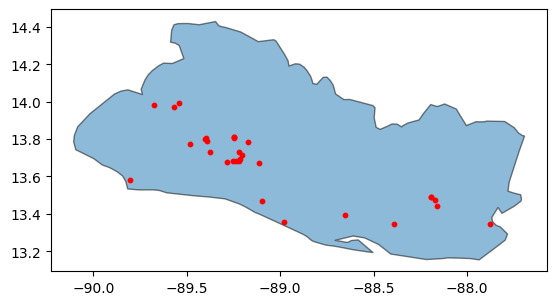

In [20]:
# prompt: Error: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

import geopandas as gpd
import pandas as pd

# Load the shapefile
gdf = gpd.read_file("/content/modified_elsalvador.shp")

# Load the wells data
wells = pd.read_csv("/content/Pozos de monitoreo.csv")

# Convert wells DataFrame to a GeoDataFrame
# Assuming 'Longitude' and 'Latitude' columns exist in wells
wells_gdf = gpd.GeoDataFrame(
    wells, geometry=gpd.points_from_xy(wells.Longitud, wells.Latitud)
)

# Ensure both GeoDataFrames have the same Coordinate Reference System (CRS)
if gdf.crs is None and wells_gdf.crs is not None:
    # If gdf has no CRS but wells_gdf does, assign the wells CRS to gdf
    gdf.set_crs(wells_gdf.crs, allow_override=True)
elif wells_gdf.crs is None and gdf.crs is not None:
    # If wells_gdf has no CRS but gdf does, assign the gdf CRS to wells_gdf
    wells_gdf.set_crs(gdf.crs, allow_override=True)
elif gdf.crs is not None and wells_gdf.crs is not None and gdf.crs != wells_gdf.crs:
    # If both have CRS but they are different, reproject wells_gdf to match gdf's CRS
    wells_gdf = wells_gdf.to_crs(gdf.crs)

# Perform the spatial join
# Use 'within' to find wells that are within the polygons of gdf
# Set 'predicate' to 'within' and 'how' to 'inner'
# You can choose 'inner', 'left', or 'right' depending on your needs
# 'inner' keeps only the geometries that intersect
joined_data = gpd.sjoin(wells_gdf, gdf, how="inner", predicate="within") # Changed 'op' to 'predicate'

# Display the first few rows of the joined data
print(joined_data.head())

# Plot the joined data (optional)
# Ensure you have a column to color the points if needed, e.g., based on the region they fall into
# For a simple plot, just plot the resulting points on top of the polygons
ax = gdf.plot(alpha=0.5, edgecolor='k') # Plot the regions first
joined_data.plot(ax=ax, color='red', markersize=10) # Plot the wells that are within regions

In [22]:
joined_data.to_csv("joined_data.csv", index=False)